In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py

from snapshot_functions import get_elemental_abundances


In [3]:
#constants
XH  = 0.76                        # the hydrogen mass fraction
gama= 5.0/3.0                     # the adiabatic index
KB  = 1.3807e-16                  # the Boltzmann constant in CGS units  [cm^2 g s^-2 K^-1]
KB_kev  = 8.6173324e-8 
mp  = 1.6726e-24                  # proton mass in CGS units

UnitMass_in_g = 1.989e43
UnitLength_in_cm    = 3.085678e21
PROTONMASS=1.6726e-24
UnitDensity_in_cgs = UnitMass_in_g / UnitLength_in_cm**3
UnitDensity_in_pccm = UnitDensity_in_cgs/PROTONMASS

In [4]:
# filename = "/Users/raouf/Work_space/projects/ParticleGridMapper.jl/main_snap/CHIMES_1205_1e6/snapshot_060.hdf5"
filename = "/Users/raouf/Work_space/projects/ParticleGridMapper.jl/CHIMES_1807/snapshots/snapshot_040.hdf5"
f = h5py.File(filename, "r")


In [5]:
elemental_abundances=get_elemental_abundances(f["PartType0"]["ChimesAbundances"])

In [6]:
print(elemental_abundances)

               H    D   He         C         N         O             F    P  \
0       1.000000  0.0  0.1  0.000238  0.000263  0.000412  3.211885e-07  0.0   
1       1.000000  0.0  0.1  0.000238  0.000263  0.000412  3.211885e-07  0.0   
2       1.000000  0.0  0.1  0.000238  0.000263  0.000412  3.211885e-07  0.0   
3       1.000000  0.0  0.1  0.000238  0.000263  0.000412  3.211840e-07  0.0   
4       1.000000  0.0  0.1  0.000238  0.000263  0.000412  3.211885e-07  0.0   
...          ...  ...  ...       ...       ...       ...           ...  ...   
397963  1.000001  0.0  0.1  0.000238  0.000263  0.000412  3.212387e-07  0.0   
397964  1.000000  0.0  0.1  0.000238  0.000263  0.000412  3.211884e-07  0.0   
397965  1.000000  0.0  0.1  0.000238  0.000263  0.000412  3.211887e-07  0.0   
397966  1.000000  0.0  0.1  0.000238  0.000263  0.000412  3.211887e-07  0.0   
397967  1.000000  0.0  0.1  0.000238  0.000263  0.000412  3.211969e-07  0.0   

               S   Cl   Li   Na        Mg        Ca

In [7]:

mu  = (4.*mp)/(1.+3.*XH+4.*XH*elemental_abundances["E-"]) # mean Molecular weight

snapshot_df=pd.DataFrame()
snapshot_df["gas_density"]=f["PartType0"]["Density"][()] * UnitDensity_in_pccm
snapshot_df["gas_density"].div(mu)

snapshot_df["gas_temp"] = f['PartType0']['InternalEnergy'][()]
snapshot_df["gas_temp"] = (gama-1)* (snapshot_df["gas_temp"]/KB)* mu* 1e10 # K


snapshot_df["coldens"]=f["PartType0"]["ChimesColumnDensity"][()]
snapshot_df["XCO"]=f["PartType0"]["ChimesAbundances"][:,148]
snapshot_df["XH2"]=f["PartType0"]["ChimesAbundances"][:,137]
snapshot_df["XHI"]=f["PartType0"]["ChimesAbundances"][:,1]
snapshot_df["XCI"]=f["PartType0"]["ChimesAbundances"][:,7]
snapshot_df["Av"]=snapshot_df["coldens"]*1.6e-21

snapshot_df["radfield"]=1.0 #Mojtaba says he's using Milky way ISRF
snapshot_df["zeta"]=1.0 # I assume also CRIR is milky way

snapshot_df["local_uv"]=snapshot_df["radfield"]*np.exp(-3.02*snapshot_df["Av"])
snapshot_df["local_uv"]=np.where(snapshot_df["local_uv"]<1e-10,1e-10,snapshot_df["local_uv"])#put a lower limit on that

/opt/homebrew/Caskroom/miniconda/base/envs/mlp/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/mlp/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/mlp/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/Caskroom/miniconda/base/envs/mlp/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


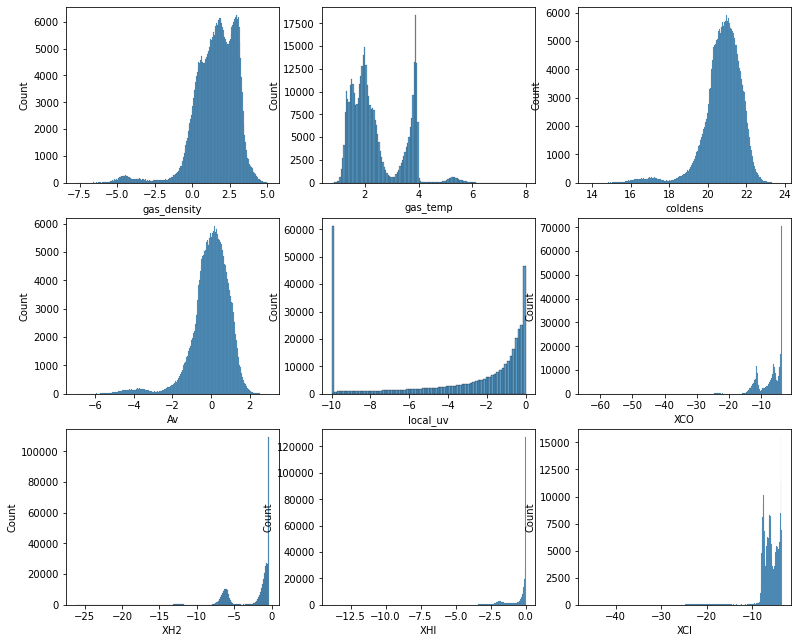

In [8]:
fig,axes=plt.subplots(3,3,figsize=(13,11))
axes=axes.flatten()

for i,variable in enumerate(["gas_density","gas_temp","coldens","Av","local_uv","XCO","XH2","XHI","XCI"]):
    sns.histplot(np.log10(snapshot_df[variable]),ax=axes[i])
